In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#For splitting dataset
from sklearn.model_selection import train_test_split
#For machine learning model
from sklearn.ensemble import RandomForestClassifier
#For model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
# Load dataset from csv file
df = pd.read_csv("synthetic_classification_dataset (1).csv")

In [47]:
# Split dataset into features(x) and target(y)
X = df.drop(columns=['Target'])
#Define target variable
y = df['Target']

# Split into training(80%) and testing(20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train a Random Forest model for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

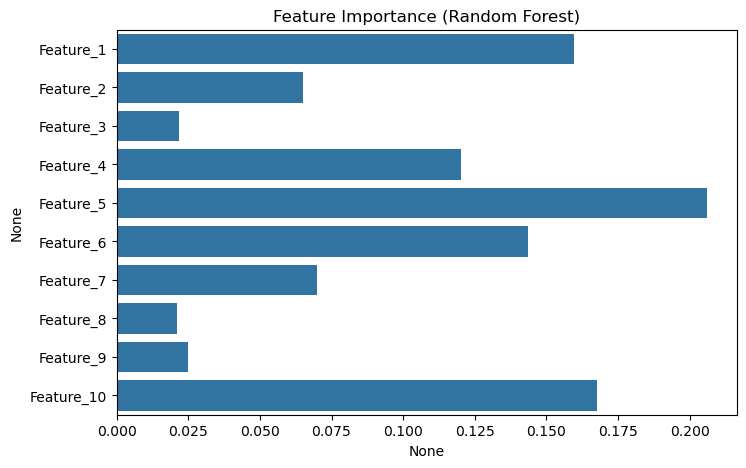

In [33]:
# Get feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)

# Plot feature importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [48]:
# Make predictions
y_pred = rf.predict(X_test)

# Calculate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.9450


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       112
           1       0.93      0.94      0.94        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200



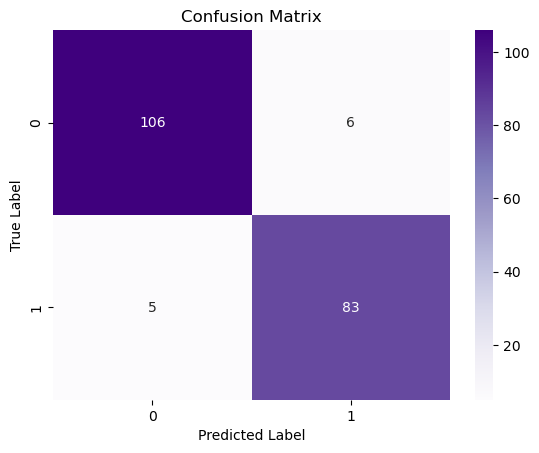

In [49]:
# Dislay classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Genrate the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the Confusion Matrix as heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()